In [2]:
import pandas as pd

trainFilepath = "Data/train.csv"
trainData = pd.read_csv(trainFilepath)

trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     210 non-null    int64  
 1   Age                    209 non-null    object 
 2   Weight_kg              208 non-null    float64
 3   PCOS                   210 non-null    object 
 4   Hormonal_Imbalance     208 non-null    object 
 5   Hyperandrogenism       207 non-null    object 
 6   Hirsutism              205 non-null    object 
 7   Conception_Difficulty  209 non-null    object 
 8   Insulin_Resistance     209 non-null    object 
 9   Exercise_Frequency     208 non-null    object 
 10  Exercise_Type          208 non-null    object 
 11  Exercise_Duration      208 non-null    object 
 12  Sleep_Hours            208 non-null    object 
 13  Exercise_Benefit       209 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 23.1+ KB

# **Data Cleaning**

In [3]:
trainData.Age.value_counts()

Age
20-25              125
15-20               50
Less than 20        18
35-44                4
25-30                4
45 and above         3
30-35                2
30-25                1
30-40                1
Less than 20-25      1
Name: count, dtype: int64

In [4]:
trainData["Age"] = trainData["Age"].replace({"20-25": "20-30",
                                             "15-20": "<20",
                                             "Less than 20": "<20",
                                             "35-44": "30-44", "25-30": "20-30",
                                             "45 and above": ">45",
                                             "30-35": "30-44",
                                             "30-25": "30-44",
                                             "30-40": "30-44",
                                             "Less than 20-25": "<20"})

trainData.Age.value_counts()

Age
20-30    129
<20       69
30-44      8
>45        3
Name: count, dtype: int64

In [5]:
trainData.Weight_kg.value_counts()

Weight_kg
47.0     12
56.0     11
53.0      9
52.0      9
55.0      8
70.0      8
41.0      7
54.0      7
49.0      7
66.0      7
59.0      6
48.0      6
51.0      6
67.0      5
45.0      5
60.0      5
62.0      5
57.0      5
58.0      5
50.0      5
43.0      4
68.0      4
65.0      4
63.0      3
61.0      3
42.0      3
30.0      3
40.0      3
64.0      3
44.0      3
71.0      3
85.0      2
74.0      2
46.0      2
73.0      2
72.0      2
69.0      2
92.0      1
54.6      1
84.0      1
91.0      1
79.0      1
80.0      1
37.5      1
36.0      1
20.0      1
36.5      1
39.0      1
82.0      1
116.0     1
52.5      1
81.0      1
37.0      1
48.5      1
75.0      1
35.0      1
38.0      1
88.0      1
53.6      1
Name: count, dtype: int64

In [6]:
trainData.PCOS.value_counts()

PCOS
No     164
Yes     46
Name: count, dtype: int64

In [7]:
trainData.Hormonal_Imbalance.value_counts()

Hormonal_Imbalance
Yes                                   111
No                                     95
No, Yes, not diagnosed by a doctor      1
Yes Significantly                       1
Name: count, dtype: int64

In [8]:
trainData["Hormonal_Imbalance"] = trainData["Hormonal_Imbalance"].replace({"Yes Significantly": "Yes"})

mask = trainData["Hormonal_Imbalance"] == "No, Yes, not diagnosed by a doctor"
trainData = trainData[~mask]

trainData.Hormonal_Imbalance.value_counts()

Hormonal_Imbalance
Yes    112
No      95
Name: count, dtype: int64

In [9]:
trainData.Hyperandrogenism.value_counts()

Hyperandrogenism
No     174
Yes     32
Name: count, dtype: int64

In [10]:
trainData.Hirsutism.value_counts()

Hirsutism
No                                    147
Yes                                    55
No, Yes, not diagnosed by a doctor      2
Name: count, dtype: int64

In [11]:
mask = trainData["Hirsutism"] == "No, Yes, not diagnosed by a doctor"
trainData = trainData[~mask]

trainData.Hirsutism.value_counts()

Hirsutism
No     147
Yes     55
Name: count, dtype: int64

In [12]:
trainData.Conception_Difficulty.value_counts()

Conception_Difficulty
No                                    198
Yes, diagnosed by a doctor              6
No, Yes, not diagnosed by a doctor      1
Yes                                     1
Name: count, dtype: int64

In [13]:
trainData["Conception_Difficulty"] = trainData["Conception_Difficulty"].replace({"Yes, diagnosed by a doctor": "Yes"})

mask = trainData["Conception_Difficulty"] == "No, Yes, not diagnosed by a doctor"
trainData = trainData[~mask]

trainData.Conception_Difficulty.value_counts()

Conception_Difficulty
No     198
Yes      7
Name: count, dtype: int64

In [14]:
trainData.Insulin_Resistance.value_counts()

Insulin_Resistance
No     182
Yes     23
Name: count, dtype: int64

In [15]:
trainData.Exercise_Frequency.value_counts()

Exercise_Frequency
Rarely               101
1-2 Times a Week      33
Never                 27
3-4 Times a Week      23
6-8 Times a Week      17
6-8 hours              1
Less than usual        1
Less than 6 hours      1
Name: count, dtype: int64

In [16]:
trainData["Exercise_Frequency"] = trainData["Exercise_Frequency"].replace({"6-8 hours": "6-8 Times a Week",
                                                                           "Less than 6 hours": "3-4 Times a Week"})

mask = trainData["Exercise_Frequency"] == "Less than usual"
trainData = trainData[~mask]

trainData.Exercise_Frequency.value_counts()

Exercise_Frequency
Rarely              101
1-2 Times a Week     33
Never                27
3-4 Times a Week     24
6-8 Times a Week     18
Name: count, dtype: int64

In [17]:
trainData.Exercise_Type.value_counts()

Exercise_Type
No Exercise                                                                                                                                                89
Cardio (e.g., running, cycling, swimming)                                                                                                                  49
Cardio (e.g.                                                                                                                                               24
Flexibility and balance (e.g., yoga, pilates)                                                                                                              16
Strength training (e.g., weightlifting, resistance exercises)                                                                                               5
Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises)                                                    4
Cardio (e.g., running, cycling, swimmi

In [18]:
trainData["Exercise_Type"] = trainData["Exercise_Type"].replace({"Cardio (e.g., running, cycling, swimming)": "Cardio",
                                                                 "Cardio (e.g.": "Cardio",
                                                                 "Flexibility and balance (e.g., yoga, pilates)": "Flexibility and Balance",
                                                                 "Strength training (e.g., weightlifting, resistance exercises)": "Strength",
                                                                 "Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises)": "Cardio",
                                                                 "Cardio (e.g., running, cycling, swimming), Flexibility and balance (e.g., yoga, pilates)": "Cardio, Flexibility and Balance",
                                                                 "High-intensity interval training (HIIT)": "HIIT",
                                                                 "Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates)": "Cardio, Strength, Flexibility and Balance",
                                                                 "Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates)": "Strength, Flexibility and Balance",
                                                                 "Flexibility and balance (e.g., yoga, pilates), None": "Flexibility and Balance",
                                                                 "Flexibility and balance (e.g., yoga, pilates), None": "Flexibility and Balance",
                                                                 "Cardio (e.g., running, cycling, swimming), None": "Cardio",
                                                                 "Strength training": "Strength",
                                                                 "Strength training (e.g.": "Strength", "Flexibility and balance (e.g.": "Flexibility and Balance"})

mask = trainData["Exercise_Type"] == "Somewhat"
trainData = trainData[~mask]

trainData.Exercise_Type.value_counts()

Exercise_Type
No Exercise                                  89
Cardio                                       78
Flexibility and Balance                      18
Strength                                      7
Cardio, Flexibility and Balance               4
HIIT                                          3
Cardio, Strength, Flexibility and Balance     2
Strength, Flexibility and Balance             1
Name: count, dtype: int64

In [19]:
trainData.Exercise_Duration.value_counts()

Exercise_Duration
Not Applicable          83
Less than 30 minutes    60
30 minutes              32
45 minutes              17
More than 30 minutes     7
20 minutes               1
Less than 6 hours        1
30 minutes to 1 hour     1
Name: count, dtype: int64

In [20]:
trainData["Exercise_Duration"] = trainData["Exercise_Duration"].replace({"Less than 30 minutes": "<30 minutes",
                                                                         "More than 30 minutes": ">30 minutes",
                                                                         "20 minutes": "<30 minutes"})

mask = trainData["Exercise_Duration"] == "Less than 6 hours"
trainData = trainData[~mask]

trainData.Exercise_Duration.value_counts()

Exercise_Duration
Not Applicable          83
<30 minutes             61
30 minutes              32
45 minutes              17
>30 minutes              7
30 minutes to 1 hour     1
Name: count, dtype: int64

In [21]:
trainData.Sleep_Hours.value_counts()

Sleep_Hours
6-8 hours             131
Less than 6 hours      56
9-12 hours             12
More than 12 hours      1
3-4 hours               1
Name: count, dtype: int64

In [22]:
trainData["Sleep_Hours"] = trainData["Sleep_Hours"].replace({"Less than 6 hours": "<6 hours",
                                                             "More than 12 hours": ">12 hours",})

trainData.Sleep_Hours.value_counts()

Sleep_Hours
6-8 hours     131
<6 hours       56
9-12 hours     12
>12 hours       1
3-4 hours       1
Name: count, dtype: int64

In [23]:
trainData.Exercise_Benefit.value_counts()

Exercise_Benefit
Somewhat             133
Not at All            26
Yes Significantly     24
Not Much              19
Name: count, dtype: int64

# **EDA**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", message=".*get_group.*", category=FutureWarning)

numericalFeatures = trainData.select_dtypes(exclude="object").copy()
categoricalFeatures = trainData.select_dtypes(include="object").drop("PCOS", axis=1).copy()

## Numerical

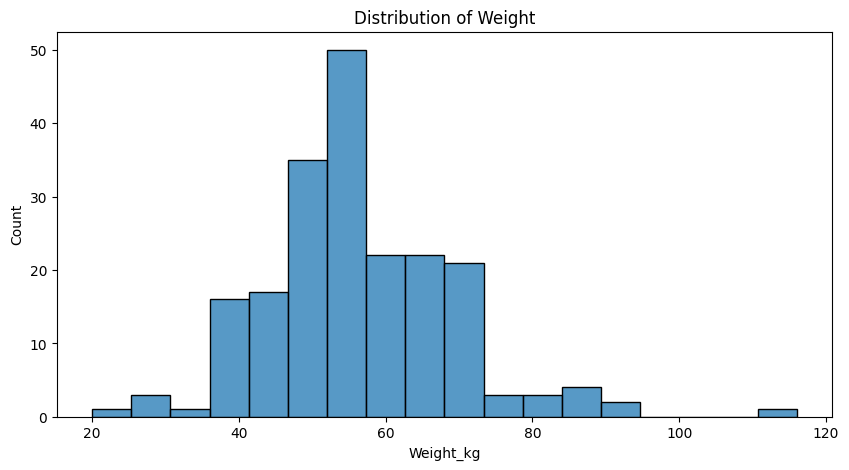

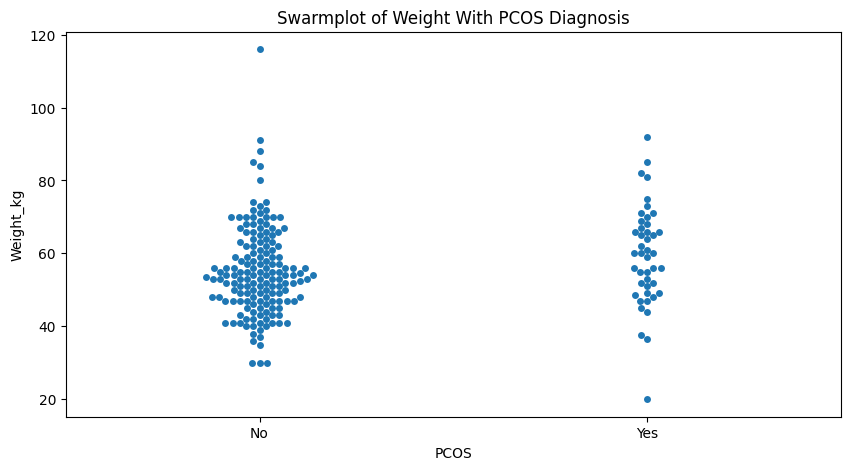

In [25]:
fig = plt.figure(figsize=(10,5))
plt.title("Distribution of Weight")
sns.histplot(numericalFeatures["Weight_kg"])
plt.show()

fig = plt.figure(figsize=(10,5))
plt.title("Swarmplot of Weight With PCOS Diagnosis")
sns.swarmplot(x=trainData["PCOS"], y=numericalFeatures["Weight_kg"])
plt.show()

Doesn't seem that weight has an impact on PCOS diagnosis.

## Categorical

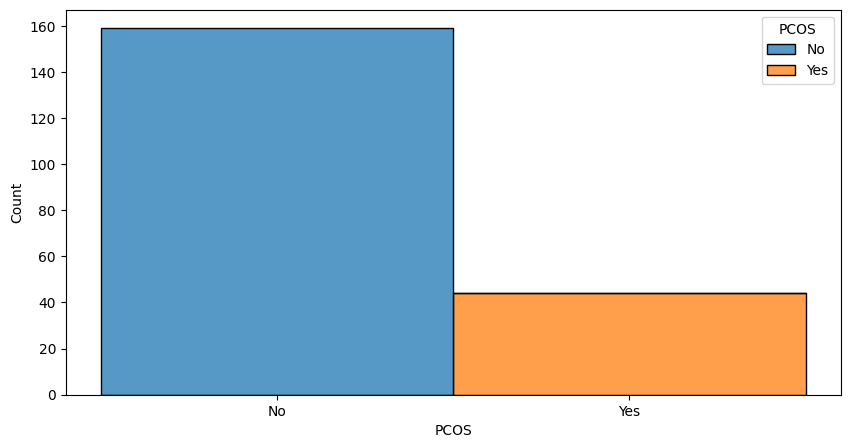

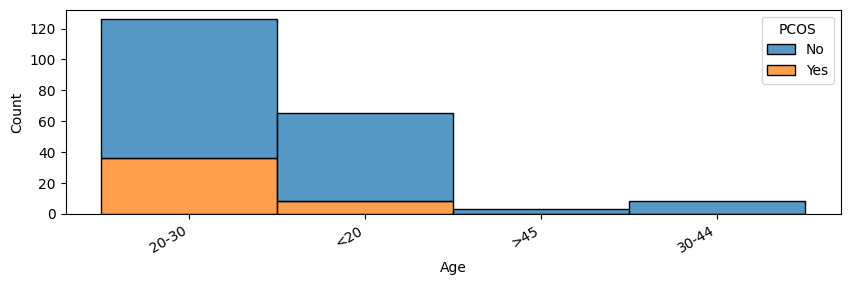

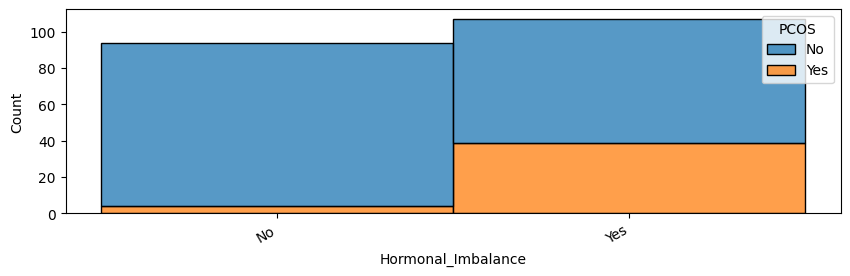

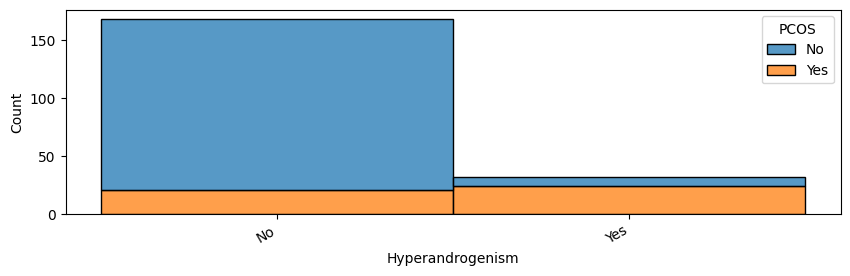

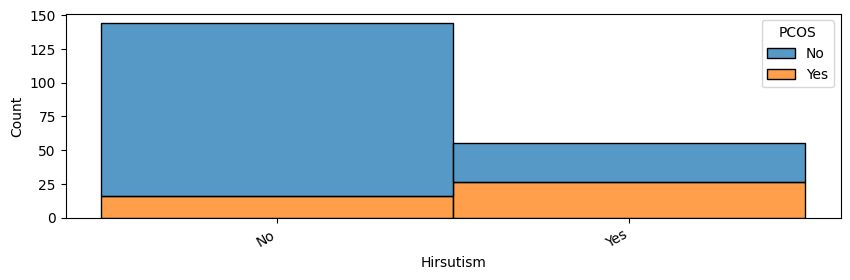

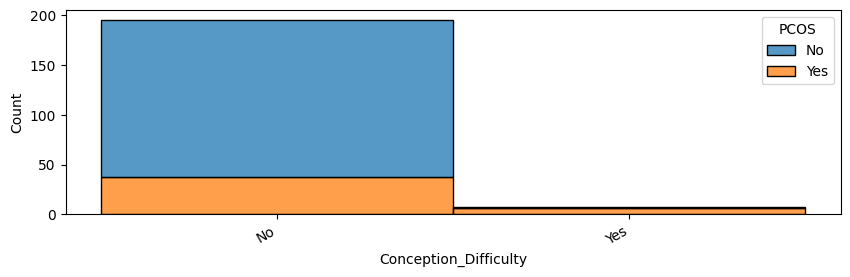

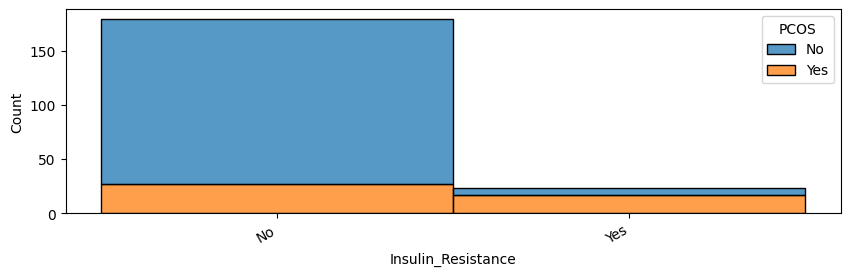

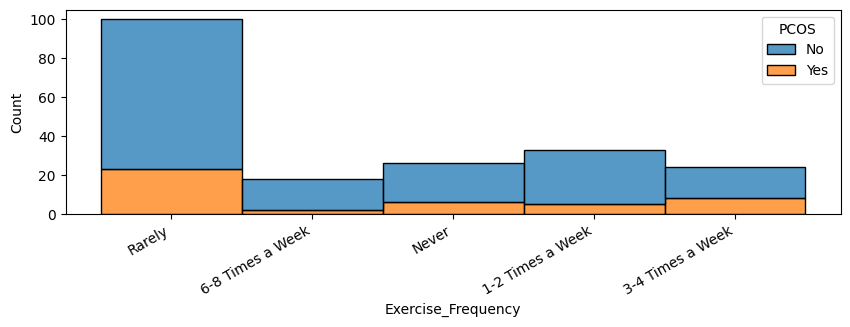

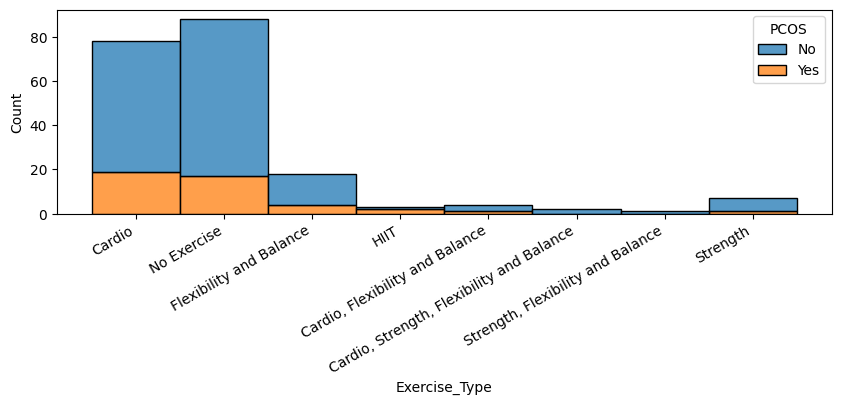

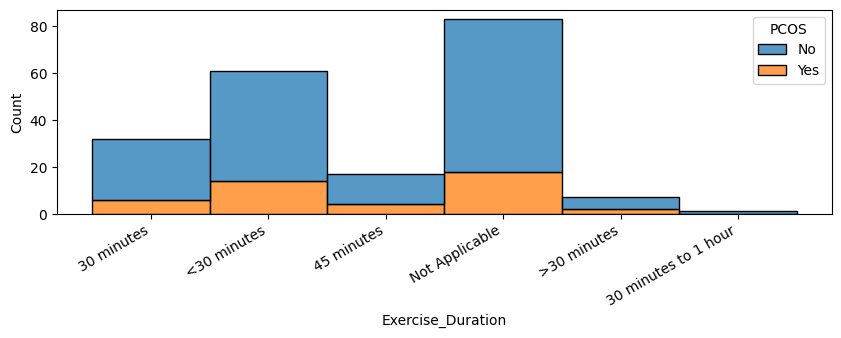

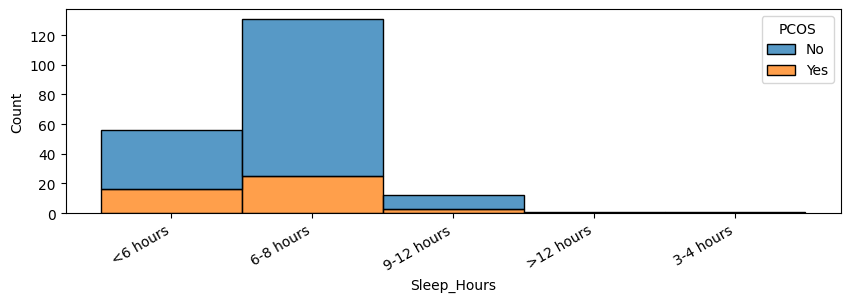

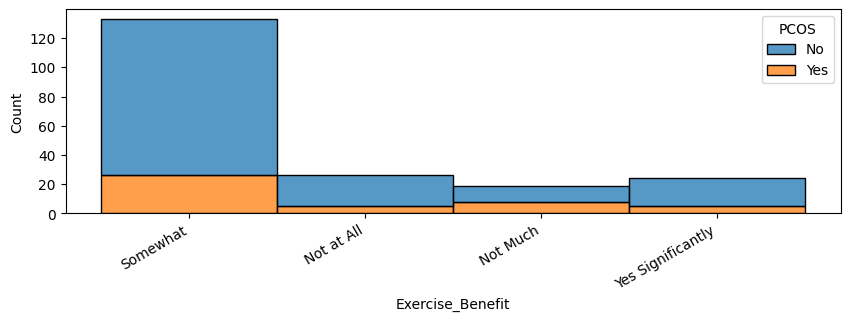

In [26]:
fig = plt.figure(figsize=(10,5))
sns.histplot(x="PCOS", hue="PCOS", data=trainData, multiple="stack")
plt.xlabel("PCOS")
plt.show()

for i,col in enumerate(categoricalFeatures.columns):
    fig = plt.figure(figsize=(10,3))
    sns.histplot(x=col, hue="PCOS", data=trainData, multiple="stack")
    plt.xlabel(col)
    plt.gcf().autofmt_xdate()
    plt.show()

Hyperandrogenism, conception difficulty and insulin resistance seem to have very high amounts of PCOS, as well as hirsutism and hormonal imbalance. Can't see any clear patterns in other data.

In [27]:
trainData[["Age", "PCOS"]].groupby(["Age", "PCOS"]).value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Age"], ascending=False).set_index("Age")

,PCOS,Probability
Age,,
>45,No,1.0
<20,No,1.0
<20,Yes,1.0
30-44,No,1.0
20-30,No,1.0
20-30,Yes,1.0


PCOS seems more prevalent in people under 30.

In [28]:
trainData[["Hormonal_Imbalance", "PCOS"]].groupby("Hormonal_Imbalance").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Hormonal_Imbalance", "PCOS"], ascending=False).set_index("Hormonal_Imbalance")

,PCOS,Probability
Hormonal_Imbalance,,
Yes,Yes,0.364486
Yes,No,0.635514
No,Yes,0.042553
No,No,0.957447


Very low chance of PCOS with no hormonal imbalance, but a much higher chance with.

In [29]:
trainData[["Hyperandrogenism", "PCOS"]].groupby("Hyperandrogenism").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Hyperandrogenism", "PCOS"], ascending=False).set_index("Hyperandrogenism")

,PCOS,Probability
Hyperandrogenism,,
Yes,Yes,0.750000
Yes,No,0.250000
No,Yes,0.119048
No,No,0.880952


Hyperandrogenism increases PCOS chance by roughly 150%.

In [30]:
trainData[["Hirsutism", "PCOS"]].groupby("Hirsutism").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Hirsutism", "PCOS"], ascending=False).set_index("Hirsutism")

,PCOS,Probability
Hirsutism,,
Yes,Yes,0.472727
Yes,No,0.527273
No,Yes,0.111111
No,No,0.888889


50% chance of PCOS with hirsutism.

In [31]:
trainData[["Conception_Difficulty", "PCOS"]].groupby("Conception_Difficulty").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Conception_Difficulty", "PCOS"], ascending=False).set_index("Conception_Difficulty")

,PCOS,Probability
Conception_Difficulty,,
Yes,Yes,0.857143
Yes,No,0.142857
No,Yes,0.194872
No,No,0.805128


Conception difficulty means an incredibly high chance of PCOS.

In [32]:
trainData[["Insulin_Resistance", "PCOS"]].groupby("Insulin_Resistance").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Insulin_Resistance", "PCOS"], ascending=False).set_index("Insulin_Resistance")

,PCOS,Probability
Insulin_Resistance,,
Yes,Yes,0.739130
Yes,No,0.260870
No,Yes,0.150838
No,No,0.849162


Twice as likely to have PCOS with insulin resistance.

In [33]:
trainData[["Exercise_Frequency", "PCOS"]].groupby("Exercise_Frequency").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Exercise_Frequency", "PCOS"], ascending=False).set_index("Exercise_Frequency")

,PCOS,Probability
Exercise_Frequency,,
Rarely,Yes,0.230000
Rarely,No,0.770000
Never,Yes,0.230769
Never,No,0.769231
6-8 Times a Week,Yes,0.111111
6-8 Times a Week,No,0.888889
3-4 Times a Week,Yes,0.333333
3-4 Times a Week,No,0.666667
1-2 Times a Week,Yes,0.151515


Seems to be a higher chance of PCOS with little to rare exercise, though 3-4 times a week seems very high.

In [34]:
trainData[["Exercise_Type", "PCOS"]].groupby("Exercise_Type").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Exercise_Type", "PCOS"], ascending=False).set_index("Exercise_Type")

,PCOS,Probability
Exercise_Type,,
"Strength, Flexibility and Balance",No,1.000000
Strength,Yes,0.142857
Strength,No,0.857143
No Exercise,Yes,0.193182
No Exercise,No,0.806818
HIIT,Yes,0.666667
HIIT,No,0.333333
Flexibility and Balance,Yes,0.222222
Flexibility and Balance,No,0.777778


HIIT seems to indicate a higher chance of PCOS than other exercise types, as well as most exercise types with cardio.

In [35]:
trainData[["Exercise_Duration", "PCOS"]].groupby("Exercise_Duration").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Exercise_Duration", "PCOS"], ascending=False).set_index("Exercise_Duration")

,PCOS,Probability
Exercise_Duration,,
Not Applicable,Yes,0.216867
Not Applicable,No,0.783133
>30 minutes,Yes,0.285714
>30 minutes,No,0.714286
<30 minutes,Yes,0.229508
<30 minutes,No,0.770492
45 minutes,Yes,0.235294
45 minutes,No,0.764706
30 minutes to 1 hour,No,1.000000


Probability of PCOS doesn't seem to be too affected by exercise duration.

In [36]:
trainData[["Sleep_Hours", "PCOS"]].groupby("Sleep_Hours").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Sleep_Hours", "PCOS"], ascending=False).set_index("Sleep_Hours")

,PCOS,Probability
Sleep_Hours,,
>12 hours,No,1.000000
<6 hours,Yes,0.285714
<6 hours,No,0.714286
9-12 hours,Yes,0.250000
9-12 hours,No,0.750000
6-8 hours,Yes,0.190840
6-8 hours,No,0.809160
3-4 hours,No,1.000000


6-8 hours of sleep seems to have a lower chance of PCOS.

In [37]:
trainData[["Exercise_Benefit", "PCOS"]].groupby("Exercise_Benefit").value_counts(dropna=True, normalize=True).reset_index(name="Probability").sort_values(by=["Exercise_Benefit", "PCOS"], ascending=False).set_index("Exercise_Benefit")

,PCOS,Probability
Exercise_Benefit,,
Yes Significantly,Yes,0.208333
Yes Significantly,No,0.791667
Somewhat,Yes,0.195489
Somewhat,No,0.804511
Not at All,Yes,0.192308
Not at All,No,0.807692
Not Much,Yes,0.421053
Not Much,No,0.578947


Not much exercise benefit seems to have a very high chance of PCOS.

**Looks like most data can be excluded, I will only keep hormonal imbalance, hyperandrogenism, hirsutism, conception difficulty and insulin resistance.**

# **Creating Test Train Split**

In [38]:
from sklearn.model_selection import train_test_split

y = trainData["PCOS"]

featuresToDrop = ["Age", "Weight_kg", "ID", "PCOS", "Exercise_Frequency", "Exercise_Type", "Exercise_Duration", "Sleep_Hours", "Exercise_Benefit"]
X = trainData.drop(featuresToDrop, axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

X.head()

,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,Conception_Difficulty,Insulin_Resistance
0,No,No,No,No,No
1,No,No,No,No,No
2,No,No,Yes,No,No
3,No,No,No,No,No
4,Yes,No,No,No,No


# **Creating Model**

In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

ordFeatures = ["Hormonal_Imbalance", "Hyperandrogenism", "Hirsutism", "Conception_Difficulty", "Insulin_Resistance"]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, ordFeatures)
    ])

model = XGBRegressor(n_estimators=500, learning_rate=0.5, early_stopping_rounds=10, n_jobs=-1, random_state=1, eval_metric="auc")

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

le = LabelEncoder()
y_train_preproc = le.fit_transform(y_train)
y_valid_preproc = le.transform(y_valid)

X_train_preproc = preprocessor.fit_transform(X_train)
X_valid_preproc = preprocessor.transform(X_valid)

# Cross validation?
pipeline.fit(X_train, y_train_preproc, model__eval_set=[[X_train_preproc, y_train_preproc], [X_valid_preproc, y_valid_preproc]], model__verbose=False)

predictions = pipeline.predict(X_valid)

score = roc_auc_score(y_valid, predictions)
print("Area Under ROC Score:", score) # Best Area Under ROC Score: 0.8352272727272727

Area Under ROC Score: 0.8352272727272727


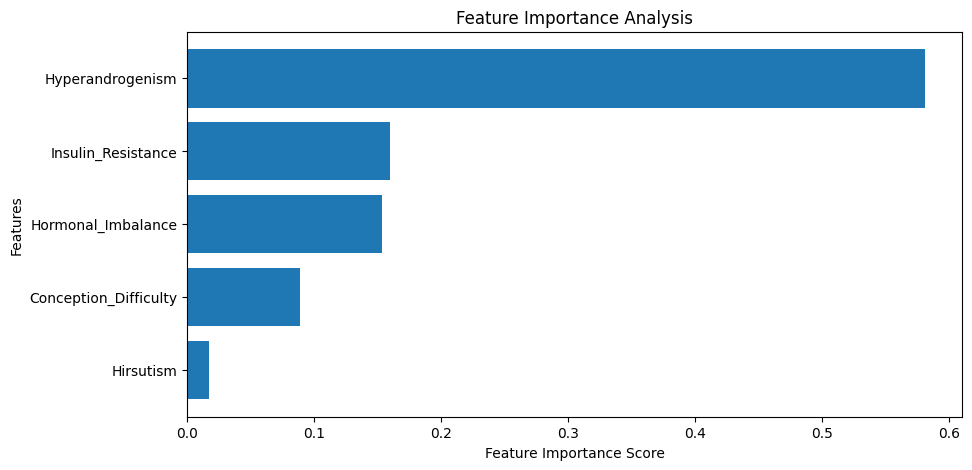

In [40]:
import numpy as np

feature_importance = pipeline.named_steps["model"].feature_importances_

feature_names = ordFeatures

sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()

# **Create Prediction**

## **Clean X_test Data**

In [41]:
testFilepath = "Data/test.csv"
testData = pd.read_csv(testFilepath)

In [42]:
testData.Hormonal_Imbalance.value_counts()

Hormonal_Imbalance
Yes    79
No     63
Name: count, dtype: int64

In [43]:
testData.Hyperandrogenism.value_counts()

Hyperandrogenism
No     128
Yes     16
Name: count, dtype: int64

In [44]:
testData.Hirsutism.value_counts()

Hirsutism
No     113
Yes     30
Name: count, dtype: int64

In [45]:
testData.Conception_Difficulty.value_counts()

Conception_Difficulty
No          137
Yes           5
Somewhat      1
Name: count, dtype: int64

In [46]:
testData["Conception_Difficulty"] = testData["Conception_Difficulty"].replace({"Somewhat": "Yes"})

testData.Conception_Difficulty.value_counts()

Conception_Difficulty
No     137
Yes      6
Name: count, dtype: int64

In [47]:
testData.Insulin_Resistance.value_counts()

Insulin_Resistance
No                   126
Yes                   16
Yes Significantly      2
Name: count, dtype: int64

In [48]:
testData["Insulin_Resistance"] = testData["Insulin_Resistance"].replace({"Yes Significantly": "Yes"})

testData.Insulin_Resistance.value_counts()

Insulin_Resistance
No     126
Yes     18
Name: count, dtype: int64

## **Predict on Data**

Output saved

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      145 non-null    int64  
 1   PCOS    145 non-null    float32
dtypes: float32(1), int64(1)
memory usage: 1.8 KB
None 

count    145.000000
mean       0.189934
std        0.250444
min        0.003694
25%        0.003694
50%        0.167549
75%        0.167549
max        0.949917
Name: PCOS, dtype: float64


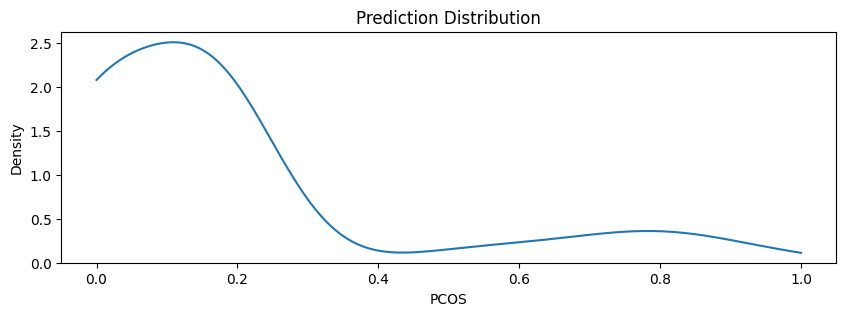

In [50]:
X_test = testData.drop(featuresToDrop, axis=1, errors="ignore")

testPredictions = pipeline.predict(X_test)

output = pd.DataFrame({"ID": testData.ID, "PCOS": testPredictions})
output.to_csv("Data/submission.csv", index=False)

print("Output saved\n")

print(output.info(),"\n")
print(output.PCOS.describe())

plt.figure(figsize=(10, 3))
plt.title("Prediction Distribution")
sns.kdeplot(output["PCOS"], clip=(0, 1))
plt.show()